In [18]:
import numpy as np
from visualization import *

In [19]:
x =   [[-0., -0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]

x = np.array(x)

In [20]:
objects = {"goal1": (4, 6, 4, 6, 4, 6),
           "goal2": (-5, -4, -5, -4, -5, -4),
           "goal3": (-6,-5,4,5,4,5),
           "obstacle1": (-1.5, -0.5, -1.5, -0.5, -1.5, -0.5),
           "obstacle2": (1.0, 2.0, 1.0, 2.0, 1.5, 2.5),
           "obstacle3": (1.0, 2.0, 0.0, 1.0, -1.0, 1.0)}

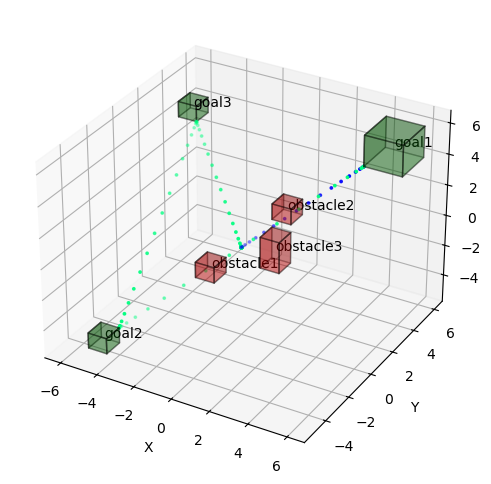

In [21]:
visualizer = Visualization(x, objects)
visualizer.visualize()

In [22]:
def distance_to_cuboid(coordinate, bounds):
    x, y, z = coordinate
    xmin, xmax, ymin, ymax, zmin, zmax = bounds

    if x < xmin:
        a = xmin
    elif x > xmax:
        a = xmax
    else:
        a = x

    if y < ymin:
        b = ymin
    elif y > ymax:
        b = ymax
    else:
        b = y

    if z < zmin:
        c = zmin
    elif z > zmax:
        c = zmax
    else:
        c = z

    return np.sqrt((x-a)**2 + (y-b)**2 + (z-c)**2)

In [23]:
# store distance to each object over time
distances = np.zeros((len(x), len(objects)))
for i in range(len(x)):
    for j, obj in enumerate(objects.values()):
        distances[i,j] = distance_to_cuboid(x[:3,i], obj)

In [31]:
x, y, z = x[:3,i]

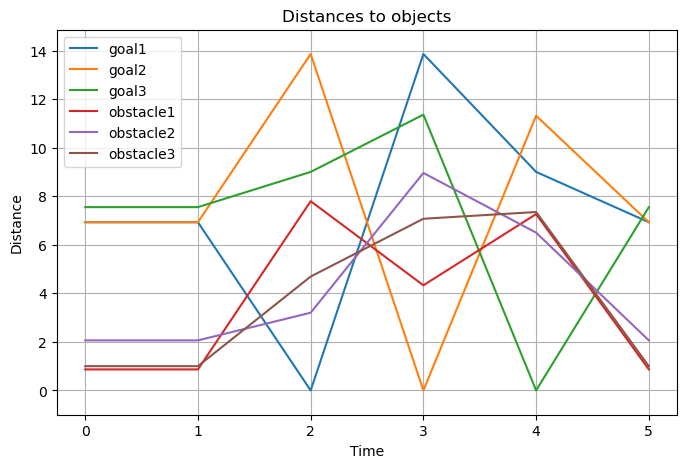

In [24]:
# plot distances to objects
plt.figure(figsize=(8, 5))
plt.title("Distances to objects")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.plot(distances)
plt.legend(objects.keys())
plt.grid()
plt.ylim(-1, max(distances.max()+1, 1))
plt.show()

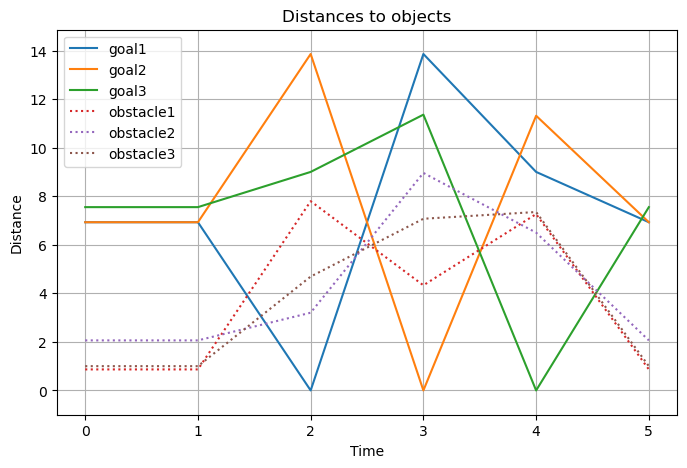

In [25]:
# plot distances to objects: different line styles for goals and obstacles
plt.figure(figsize=(8, 5))
plt.title("Distances to objects")
plt.xlabel("Time")
plt.ylabel("Distance")
for i in range(len(objects)):
    if i < 3:
        plt.plot(distances[:,i], label=list(objects.keys())[i], linestyle="-")
    else:
        plt.plot(distances[:,i], label=list(objects.keys())[i], linestyle=":")
plt.legend()
plt.grid()
plt.ylim(-1, max(distances.max()+1, 1))
plt.show()

In [26]:
# get distances to goals
distances_to_goals = distances[:, :3]
# get distances to obstacles
distances_to_obstacles = distances[:, 3:]

In [27]:
list(objects.keys())[:3]

['goal1', 'goal2', 'goal3']

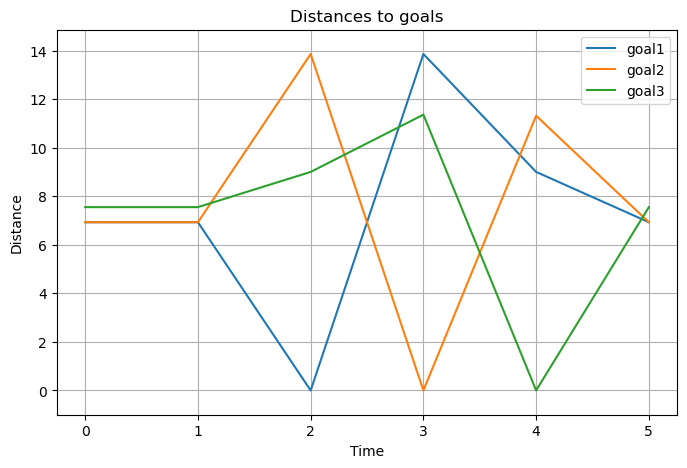

In [28]:
# plot distances to goals
plt.figure(figsize=(8, 5))
plt.title("Distances to goals")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.plot(distances_to_goals)
plt.legend(list(objects.keys())[:3])
plt.grid()
plt.ylim(-1, max(distances_to_goals.max()+1, 1))
plt.show()

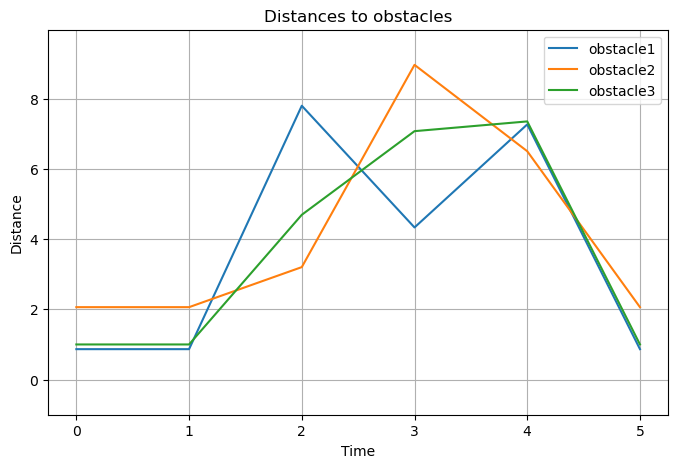

In [29]:
# plot distances to obstacles
plt.figure(figsize=(8, 5))
plt.title("Distances to obstacles")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.plot(distances_to_obstacles)
plt.legend(list(objects.keys())[3:])
plt.ylim(-1, max(distances_to_obstacles.max()+1, 1))
plt.grid()
plt.show()